<a href="https://colab.research.google.com/github/gabyrr/CursoTIA/blob/main/TIA_ejemplo_clasificacion_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de clasificación: dígitos escritos a mano
Notebook perteneciente al curso: Tópicos de inteligencia artificial: de métodos clásicos a modelos generativos. Por Gabriela Ramírez de la Rosa

In [1]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

Imprimir algunos ejemplos del dataset

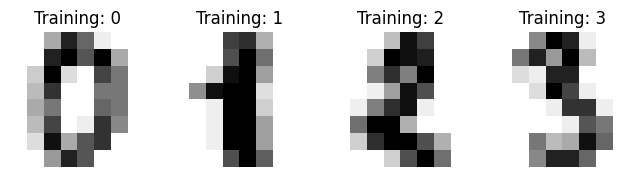

In [31]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(8, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


Etapa de división de datos en subconjunto de entrenamiento y prueba; creación del modelo; y predicción

In [25]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
y_pred = clf.predict(X_test)

Visualizamos algunas predicciones

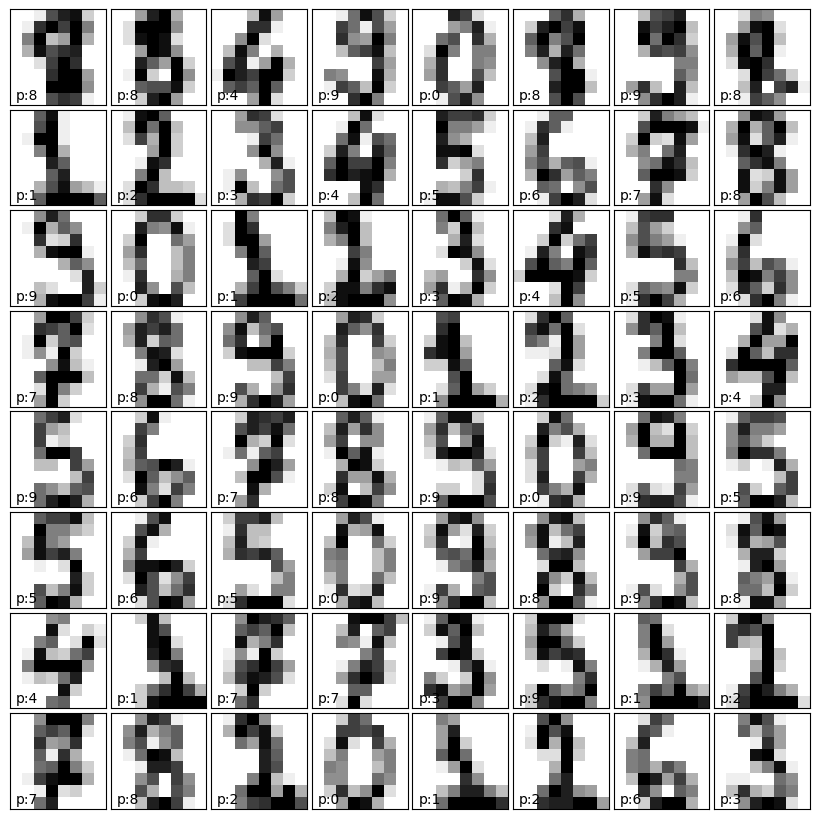

In [26]:
fig = plt.figure(figsize=(8, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    image = X_test[i].reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, "p:"+str(y_pred[i]))

Reporte de clasificación

In [27]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Matriz de confusión

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


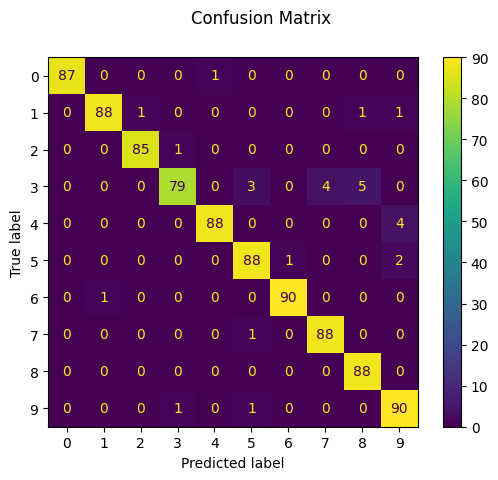

In [29]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [30]:
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("precisión: ", metrics.precision_score(y_test, y_pred,average='macro'))
print("recuerdo: ", metrics.recall_score(y_test, y_pred,average='macro'))
print("f-score: ", metrics.f1_score(y_test, y_pred,average='macro'))

accuracy:  0.9688542825361512
precisión:  0.9696983376479764
recuerdo:  0.9691763901507882
f-score:  0.9688738265020351


## Práctica
1. Qué esquema de evaluación se utilizó (cómo se dividieron los datos para entrenar y evaluar)
2. ¿Qué otro esquema de evaluación utilizaría y por qué?
3. En el esquema split fijo, modifique la proporción para entrenamiento y evaluación. ¿Qué conviene más tener más datos de entrenamiento o más datos de prueba?
4. Pruebe otros algoritmos de aprendizaje, por ejemplo árboles de decisión y perceptrón ()